Dylan Hastings

# 1. Tennis Surface Check

Use a linear regression and statsmodels to find which surface type predicts the most points for Federer in the `tennis.csv` dataset.

1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value. 



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sc
from scipy import stats
import statsmodels.api as sm
sns.set()

In [2]:
df = pd.read_csv('data/tennis.csv')

In [3]:
df = df.loc[df.isna().sum(axis=1) == 0]

In [4]:
sm.OLS(
    df['player1 total points won'],
    pd.get_dummies(df.surface, drop_first=True)
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     player1 total points won   R-squared (uncentered):                   0.865
Model:                                  OLS   Adj. R-squared (uncentered):              0.865
Method:                       Least Squares   F-statistic:                              1623.
Date:                      Fri, 22 Jan 2021   Prob (F-statistic):                        0.00
Time:                              18:29:31   Log-Likelihood:                         -5009.2
No. Observations:                      1016   AIC:                                  1.003e+04
Df Residuals:                          1012   BIC:                                  1.005e+04
Df Model:                                 4                                                  
Covariance Type:                  nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Indoor: Hard      77.0825      2.410     31.990      0.000      72.354      81.811
Outdoor: Clay     88.0880      2.284     38.575      0.000      83.607      92.569
Outdoor: Grass    98.6935      3.014     32.746      0.000      92.779     104.608
Outdoor: Hard     87.8188      1.628     53.944      0.000      84.624      91.013
==============================================================================
Omnibus:                      212.052   Durbin-Watson:                   1.192
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.573
Skew:                           1.209   Prob(JB):                     3.49e-91
Kurtosis:                       4.998   Cond. No.                         1.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
sm.OLS(
    df['player1 total points won'],
    sm.add_constant(
        pd.get_dummies(df.surface, drop_first=True)
    )
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     player1 total points won   R-squared:                       0.048
Model:                                  OLS   Adj. R-squared:                  0.044
Method:                       Least Squares   F-statistic:                     12.68
Date:                      Fri, 22 Jan 2021   Prob (F-statistic):           4.51e-10
Time:                              18:29:31   Log-Likelihood:                -4793.2
No. Observations:                      1016   AIC:                             9596.
Df Residuals:                          1011   BIC:                             9621.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             83.2281      3.596     23.147      0.000      76.172      90.284
Indoor: Hard      -6.1456      4.090     -1.503      0.133     -14.171       1.880
Outdoor: Clay      4.8599      4.042      1.202      0.230      -3.073      12.792
Outdoor: Grass    15.4655      4.344      3.560      0.000       6.941      23.990
Outdoor: Hard      4.5908      3.829      1.199      0.231      -2.923      12.105
==============================================================================
Omnibus:                      141.907   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.211
Skew:                           0.915   Prob(JB):                     3.77e-51
Kurtosis:                       4.463   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the Indoor: Carpet surface was dropped, Federer is predicted to score approximately 83 points on this surface.  A p-value of 0.000 indicates that we can be fairly confident in this prediction.  Since the coefficient for the Indoor: Hard surface is negative, Federer is predicted to score approximately 6 points less on this surface compared to Indoor: Carpet.  A p-value of 0.133 indicates uncertainty in this prediction.  Since the coefficient for the Outdoor: Clay surface is postive, Federer is predicted to score approximately 5 points more on this surface compared to Indoor: Carpet.  A p-value of 0.230 indicates uncertainty in this prediction. Since the coefficient for the Outdoor: Grass surface is positive, Federer is predicted to score approximately 15 points more on this surface compared to Indoor: Carpet.  A p-value of 0.000 indicates that we can be fairly confident in this prediction. Since the coefficient for the Outdoor: Hard surface is positive, Federer is predicted to score approximately 5 points more on this surface compared to Indoor: Carpet.  A p-value of 0.231 indicates uncertainty in this prediction.

2. Answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?



In this case, a constant term is useful because it makes the results easier to interpret.  We can clearly see the relationship between each surface and the Indoor: Carpet surface as defined above.  In the regression without the constant term, it is more difficult to see how each of the surfaces compare.

3. Do a t-test to find that the largest coefficient is statistically significantly different from the second largest (hint: you can run a t-test only with mean values and standard deviations)

In [6]:
og = df.loc[df.surface == 'Outdoor: Grass']
og_mean = og['player1 total points won'].mean()
og_mean

98.69354838709677

In [7]:
og_std = og['player1 total points won'].std()
og_std

33.096846660237865

In [8]:
og_nobs = len(og)
og_nobs

124

In [9]:
oc = df.loc[df.surface == 'Outdoor: Clay']
oc_mean = oc['player1 total points won'].mean()
oc_mean

88.08796296296296

In [10]:
oc_std = oc['player1 total points won'].std()
oc_std

30.435393159304056

In [11]:
oc_nobs = len(oc)
oc_nobs

216

In [12]:
stats.ttest_ind_from_stats(og_mean, og_std, og_nobs, oc_mean, oc_std, og_nobs)

Ttest_indResult(statistic=2.626549470642219, pvalue=0.009166903806269553)

Since the p-value is less than 0.01, we reject the hypothesis that the two surfaces are statistically insignificant.  Therefore, the number of points Federer scores on Outdoor: Grass is statistically significantly different from the number of points he scores on Outdoor: Clay.

# 2. Titanic prediction contest

Use whatever tricks you can to best model whether a passenger would survive the titanic disaster (using linear regression).

1. Use non-regularized regression to build the best model you can. Show 2 alternate model speficications and explain why you chose the one you did



In [13]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [14]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [15]:
df['class'] = df['class'].astype('str')
df['deck'] = df['deck'].astype('str')

In [16]:
df = df.dropna()

In [17]:
pd.get_dummies(df)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,...,deck_D,deck_E,deck_F,deck_G,deck_nan,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,0,1,...,0,0,0,0,1,0,0,1,1,0
1,1,1,38.0,1,0,71.2833,False,False,1,0,...,0,0,0,0,0,1,0,0,0,1
2,1,3,26.0,0,0,7.9250,False,True,1,0,...,0,0,0,0,1,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,False,False,1,0,...,0,0,0,0,0,0,0,1,0,1
4,0,3,35.0,0,0,8.0500,True,True,0,1,...,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,False,False,1,0,...,0,0,0,0,1,0,1,0,1,0
886,0,2,27.0,0,0,13.0000,True,True,0,1,...,0,0,0,0,1,0,0,1,1,0
887,1,1,19.0,0,0,30.0000,False,True,1,0,...,0,0,0,0,0,0,0,1,0,1
889,1,1,26.0,0,0,30.0000,True,True,0,1,...,0,0,0,0,0,1,0,0,0,1


In [18]:
df1 = pd.get_dummies(df.drop(columns={'survived'}))
df1 = sm.add_constant(df1)
df1

,const,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,...,deck_D,deck_E,deck_F,deck_G,deck_nan,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
0,1.0,3,22.0,1,0,7.2500,True,False,0,1,...,0,0,0,0,1,0,0,1,1,0
1,1.0,1,38.0,1,0,71.2833,False,False,1,0,...,0,0,0,0,0,1,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,False,True,1,0,...,0,0,0,0,1,0,0,1,0,1
3,1.0,1,35.0,1,0,53.1000,False,False,1,0,...,0,0,0,0,0,0,0,1,0,1
4,1.0,3,35.0,0,0,8.0500,True,True,0,1,...,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,1.0,3,39.0,0,5,29.1250,False,False,1,0,...,0,0,0,0,1,0,1,0,1,0
886,1.0,2,27.0,0,0,13.0000,True,True,0,1,...,0,0,0,0,1,0,0,1,1,0
887,1.0,1,19.0,0,0,30.0000,False,True,1,0,...,0,0,0,0,0,0,0,1,0,1
889,1.0,1,26.0,0,0,30.0000,True,True,0,1,...,0,0,0,0,0,1,0,0,0,1


In [19]:
df1['adult_male'] = df1['adult_male'].astype('int')
df1['alone'] = df1['alone'].astype('int')
df1

,const,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,...,deck_D,deck_E,deck_F,deck_G,deck_nan,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
0,1.0,3,22.0,1,0,7.2500,1,0,0,1,...,0,0,0,0,1,0,0,1,1,0
1,1.0,1,38.0,1,0,71.2833,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,0,1,1,0,...,0,0,0,0,1,0,0,1,0,1
3,1.0,1,35.0,1,0,53.1000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,1.0,3,35.0,0,0,8.0500,1,1,0,1,...,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,1.0,3,39.0,0,5,29.1250,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
886,1.0,2,27.0,0,0,13.0000,1,1,0,1,...,0,0,0,0,1,0,0,1,1,0
887,1.0,1,19.0,0,0,30.0000,0,1,1,0,...,0,0,0,0,0,0,0,1,0,1
889,1.0,1,26.0,0,0,30.0000,1,1,0,1,...,0,0,0,0,0,1,0,0,0,1


In [20]:
sm.OLS(
    df.survived,
            df1
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.479e+29
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:29:39   Log-Likelihood:                 22613.
No. Observations:                 712   AIC:                        -4.518e+04
Df Residuals:                     691   BIC:                        -4.509e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1029   1.84e-16    5.6e+14      0.000       0.103       0.103
pclass                      0.0686   2.16e-16   3.17e+14      0.000       0.069       0.069
age                      1.171e-17   1.38e-17      0.848      0.397   -1.54e-17    3.88e-17
sibsp                    1.636e-15   2.38e-16      6.878      0.000    1.17e-15     2.1e-15
parch                   -2.897e-15   2.27e-16    -12.735      0.000   -3.34e-15   -2.45e-15
fare                     -1.16e-17   3.91e-18     -2.968      0.003   -1.93e-17   -3.93e-18
adult_male                  0.0206   3.42e-16   6.02e+13      0.000       0.021       0.021
alone                    3.712e-16   4.73e-16      0.784      0.433   -5.58e-16     1.3e-15
sex_female                  0.0515   4.47e-16   1.15e+14      0.000       0.051       0.051
sex_male                    0.0515   4.73e-16   1.09e+14      0.000       0.051       0.051
embarked_C                  0.0343   1.82e-16   1.88e+14      0.000       0.034       0.034
embarked_Q                  0.0343   2.92e-16   1.18e+14      0.000       0.034       0.034
embarked_S                  0.0343   1.48e-16   2.31e+14      0.000       0.034       0.034
class_First                 0.1029   3.76e-16   2.74e+14      0.000       0.103       0.103
class_Second                0.0343   3.03e-16   1.13e+14      0.000       0.034       0.034
class_Third                -0.0343   1.59e-16  -2.15e+14      0.000      -0.034      -0.034
who_child                   0.0412   3.94e-16   1.05e+14      0.000       0.041       0.041
who_man                     0.0206   3.42e-16   6.02e+13      0.000       0.021       0.021
who_woman                   0.0412   4.61e-16   8.94e+13      0.000       0.041       0.041
deck_A                      0.0129   1.12e-15   1.15e+13      0.000       0.013       0.013
deck_B                      0.0129   7.08e-16   1.82e+13      0.000       0.013       0.013
deck_C                      0.0129    6.7e-16   1.92e+13      0.000       0.013       0.013
deck_D                      0.0129   7.43e-16   1.73e+13      0.000       0.013       0.013
deck_E                      0.0129   7.42e-16   1.73e+13      0.000       0.013       0.013
deck_F                      0.0129   1.19e-15   1.09e+13      0.000       0.013       0.013
deck_G                      0.0129   1.84e-15   6.99e+12      0.000       0.013       0.013
deck_nan                    0.0129   5.46e-16   2.36e+13      0.000       0.013       0.013
embark_town_Cherbourg       0.0343   1.82e-16   1.88e+14      0.000       0.034       0.034
embark_town_Queenstown      0.0343   2.92e-16   1.18e+14      0.000       0.034       0.034
embark_town_Southampton     0.0343   1.48e-16   2.31e+14      0.000       0.034       0.034
alive_no                   -0.4485   2.45e-16  

In [21]:
X = df1
X

,const,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,...,deck_D,deck_E,deck_F,deck_G,deck_nan,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
0,1.0,3,22.0,1,0,7.2500,1,0,0,1,...,0,0,0,0,1,0,0,1,1,0
1,1.0,1,38.0,1,0,71.2833,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,0,1,1,0,...,0,0,0,0,1,0,0,1,0,1
3,1.0,1,35.0,1,0,53.1000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,1.0,3,35.0,0,0,8.0500,1,1,0,1,...,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,1.0,3,39.0,0,5,29.1250,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
886,1.0,2,27.0,0,0,13.0000,1,1,0,1,...,0,0,0,0,1,0,0,1,1,0
887,1.0,1,19.0,0,0,30.0000,0,1,1,0,...,0,0,0,0,0,0,0,1,0,1
889,1.0,1,26.0,0,0,30.0000,1,1,0,1,...,0,0,0,0,0,1,0,0,0,1


In [22]:
X['pclass2'] = X.pclass ** 2
X['age2'] = X.age ** 2
X['parch2'] = X.parch ** 2
X['fare2'] = X.fare ** 2

In [23]:
sm.OLS(
    df.survived,
            X
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.397e+25
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:29:40   Log-Likelihood:                 18899.
No. Observations:                 712   AIC:                        -3.775e+04
Df Residuals:                     688   BIC:                        -3.764e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1022   4.56e-14   2.24e+12      0.000       0.102       0.102
pclass                      0.0828   3.54e-14   2.34e+12      0.000       0.083       0.083
age                      3.587e-14   1.07e-14      3.368      0.001     1.5e-14    5.68e-14
sibsp                   -1.588e-13   4.43e-14     -3.585      0.000   -2.46e-13   -7.18e-14
parch                   -2.027e-13    9.5e-14     -2.134      0.033   -3.89e-13   -1.62e-14
fare                    -1.489e-14   1.81e-15     -8.205      0.000   -1.84e-14   -1.13e-14
adult_male                  0.0204   6.99e-14   2.92e+11      0.000       0.020       0.020
alone                   -2.455e-13   9.15e-14     -2.683      0.007   -4.25e-13   -6.59e-14
sex_female                  0.0511    8.5e-14   6.01e+11      0.000       0.051       0.051
sex_male                    0.0511   8.84e-14   5.78e+11      0.000       0.051       0.051
embarked_C                  0.0341   3.58e-14   9.52e+11      0.000       0.034       0.034
embarked_Q                  0.0341   5.43e-14   6.27e+11      0.000       0.034       0.034
embarked_S                  0.0341   2.97e-14   1.15e+12      0.000       0.034       0.034
class_First                 0.0966   6.69e-14   1.44e+12      0.000       0.097       0.097
class_Second                0.0304   6.13e-14   4.95e+11      0.000       0.030       0.030
class_Third                -0.0248    2.3e-14  -1.08e+12      0.000      -0.025      -0.025
who_child                   0.0409    9.3e-14   4.39e+11      0.000       0.041       0.041
who_man                     0.0204   6.99e-14   2.92e+11      0.000       0.020       0.020
who_woman                   0.0409   9.92e-14   4.12e+11      0.000       0.041       0.041
deck_A                      0.0128   2.07e-13   6.17e+10      0.000       0.013       0.013
deck_B                      0.0128   1.31e-13   9.71e+10      0.000       0.013       0.013
deck_C                      0.0128   1.27e-13      1e+11      0.000       0.013       0.013
deck_D                      0.0128   1.37e-13   9.29e+10      0.000       0.013       0.013
deck_E                      0.0128   1.38e-13   9.25e+10      0.000       0.013       0.013
deck_F                      0.0128   2.19e-13   5.83e+10      0.000       0.013       0.013
deck_G                      0.0128   3.41e-13   3.75e+10      0.000       0.013       0.013
deck_nan                    0.0128   1.01e-13   1.26e+11      0.000       0.013       0.013
embark_town_Cherbourg       0.0341   3.58e-14   9.52e+11      0.000       0.034       0.034
embark_town_Queenstown      0.0341   5.43e-14   6.27e+11      0.000       0.034       0.034
embark_town_Southampton     0.0341   2.97e-14   1.15e+12      0.000       0.034       0.034
alive_no                   -0.4489   4.76e-14  

In [ ]:
The second model with the squared attributes has a higher AIC and BIC, so the first model is preferable.

2. Interpret the coefficients in your model. Which attributes best relate to survival probability? How does this relate to socio-economic characteristics and "real-world" interpretation?



Some of the attributes that best relate to survival probability are the class, sex and age of the passenger.  The sex and age attributes can be explained by the fact that women and children were prioritized when boarding the lifeboats.  First class passengers were also prioritized, followed by second class passengers.  Over 100 years later, it is unfortunately still the case that so-called "first class" citzens are prioritized, and have greater life expectancies.

3. Use regularized regression to build a purely predictive model. Can you improve your accuracy? Plot the regularized model against the interpretable model predictions in a regression plot to make your case.

In [24]:
from sklearn import linear_model
l = linear_model.Lasso()
model = l.fit(df1, df.survived)
predictions = model.predict(df1)

In [25]:
from sklearn.metrics import r2_score
r2_score(df.survived, predictions)

0.09849283514685636

The r2 score with the Lasso model is significantly lower.

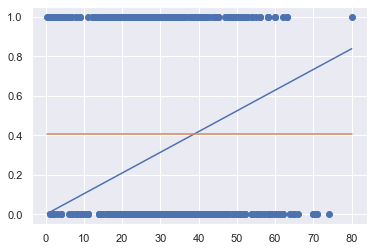

In [35]:
y = df.survived
x = df.age
xmin, xmax = x.min(), x.max()
xfit = np.linspace(xmin, xmax, 100)
est = sm.OLS(y, x).fit()
yfit = est.predict(xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit)
model.fit(x[:, np.newaxis], y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

# House Price prediction

Using the techniques you learned, use everything you can to build the best **interpretable** (eg. non-regularized) regression model on the `house_price.csv` dataset. You also have `house_price_data_description.txt` to help -- full description of each column.

Here's a brief version of what you'll find in the data description file.

**SalePrice** - the property's sale price in dollars. **This is the target variable that you're trying to predict.**

Here are the features you can use (or engineer into new features!) for your `X` matrix:

    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [83]:
df = pd.read_csv('data/house_price.csv')

In [84]:
def missing_report(df):
  percent_missing=df.isnull().sum() * 100 / len(df)
  missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing,
                                  'count_missing':df.isnull().sum()})
  missing_value_df.sort_values('percent_missing', inplace=True)
  return missing_value_df[missing_value_df['percent_missing']>0]

missing_report(df)

,column_name,percent_missing,count_missing
Electrical,Electrical,0.068493,1
MasVnrType,MasVnrType,0.547945,8
MasVnrArea,MasVnrArea,0.547945,8
BsmtQual,BsmtQual,2.534247,37
BsmtCond,BsmtCond,2.534247,37
BsmtFinType1,BsmtFinType1,2.534247,37
BsmtFinType2,BsmtFinType2,2.602740,38
BsmtExposure,BsmtExposure,2.602740,38
GarageQual,GarageQual,5.547945,81
GarageFinish,GarageFinish,5.547945,81


Since over 80% of the final 4 columns are missing, these columns are dropped.

In [85]:
df = df.drop(columns=['Fence', 'Alley', 'MiscFeature', 'PoolQC'])

The Fireplace Quality NaN values are replaced by the mode.

In [86]:
df['FireplaceQu'].mode()

0    Gd
dtype: object

In [87]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('Gd')

In [88]:
df['LotFrontage'] = df1['LotFrontage'].fillna(df1.LotFrontage.mean())

In [89]:
df = df.dropna()

In [126]:
df1 = pd.get_dummies(df.drop(columns={'SalePrice'}))
df1 = sm.add_constant(df1)
df1

,const,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,1,60,65.0,8450,7,5,2003,2003,196.0,...,0,0,0,1,0,0,0,0,1,0
1,1.0,2,20,80.0,9600,6,8,1976,1976,0.0,...,0,0,0,1,0,0,0,0,1,0
2,1.0,3,60,68.0,11250,7,5,2001,2002,162.0,...,0,0,0,1,0,0,0,0,1,0
3,1.0,4,70,60.0,9550,7,5,1915,1970,0.0,...,0,0,0,1,1,0,0,0,0,0
4,1.0,5,60,84.0,14260,8,5,2000,2000,350.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,1456,60,62.0,7917,6,5,1999,2000,0.0,...,0,0,0,1,0,0,0,0,1,0
1456,1.0,1457,20,85.0,13175,6,6,1978,1988,119.0,...,0,0,0,1,0,0,0,0,1,0
1457,1.0,1458,70,66.0,9042,7,9,1941,2006,0.0,...,0,0,0,1,0,0,0,0,1,0
1458,1.0,1459,20,68.0,9717,5,6,1950,1996,0.0,...,0,0,0,1,0,0,0,0,1,0


In [127]:
sm.OLS(
    df.SalePrice,
            df1
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     63.30
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:26:31   Log-Likelihood:                -15219.
No. Observations:                1338   AIC:                         3.090e+04
Df Residuals:                    1109   BIC:                         3.209e+04
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.094e+04   1.17e+05     -0.350      0.726    -2.7e+05    1.88e+05
Id                        1.3694      1.649      0.830      0.406      -1.866       4.605
MSSubClass              -45.6706     92.078     -0.496      0.620    -226.337     134.996
LotFrontage              64.5643     46.555      1.387      0.166     -26.781     155.909
LotArea                   0.7968      0.116      6.897      0.000       0.570       1.024
OverallQual            6704.5840   1109.899      6.041      0.000    4526.844    8882.324
OverallCond            6212.4992    950.581      6.535      0.000    4347.358    8077.640
YearBuilt               332.5331     89.991      3.695      0.000     155.961     509.105
YearRemodAdd             67.0710     62.288      1.077      0.282     -55.144     189.286
MasVnrArea               19.8372      5.945      3.337      0.001       8.172      31.502
BsmtFinSF1               17.3341      3.017      5.745      0.000      11.414      23.254
BsmtFinSF2                6.5761      6.181      1.064      0.288      -5.552      18.704
BsmtUnfSF                -1.7952      2.946     -0.609      0.542      -7.575       3.985
TotalBsmtSF              22.1150      4.481      4.935      0.000      13.323      30.907
1stFlrSF                 15.1996      7.714      1.970      0.049       0.064      30.335
2ndFlrSF                 36.1758      6.341      5.705      0.000      23.733      48.618
LowQualFinSF            -17.4413     17.049     -1.023      0.307     -50.893      16.010
GrLivArea                33.9341      6.630      5.119      0.000      20.926      46.942
BsmtFullBath            828.7124   2113.029      0.392      0.695   -3317.272    4974.697
BsmtHalfBath            949.7276   3168.943      0.300      0.764   -5268.073    7167.528
FullBath               3186.4633   2445.051      1.303      0.193   -1610.984    7983.911
HalfBath                466.9019   2265.072      0.206      0.837   -3977.409    4911.213
BedroomAbvGr          -3696.5552   1512.656     -2.444      0.015   -6664.545    -728.565
KitchenAbvGr          -1.683e+04   7511.632     -2.240      0.025   -3.16e+04   -2088.685
TotRmsAbvGrd           1086.8305   1015.984      1.070      0.285    -906.636    3080.297
Fireplaces             2117.7572   1601.516      1.322      0.186   -1024.585    5260.099
GarageYrBlt             -13.1541     66.486     -0.198      0.843    -143.606     117.298
GarageCars             3775.0901   2387.267      1.581      0.114    -908.979    8459.159
GarageArea               17.0080      8.190      2.077      0.038       0.937      33.078
WoodDeckSF               13.4523      6.102      2.204      0.028       1.479      25.426
OpenPorchSF               1.3085     12.678      0.103      0.918     -23.567      26.184
EnclosedPorch          

In [128]:
df1['OverallQual_sq'] = df1['OverallQual'] ** 2
df1['BsmtFinSF1_sq'] = df1['BsmtFinSF1'] ** 2
df1['2ndFlrSF_sq'] = df1['2ndFlrSF'] ** 2

In [129]:
sm.OLS(
    df.SalePrice,
            df1
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     68.49
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:26:32   Log-Likelihood:                -15160.
No. Observations:                1338   AIC:                         3.078e+04
Df Residuals:                    1106   BIC:                         3.199e+04
Df Model:                         231                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.484e+04   1.12e+05     -0.489      0.625   -2.75e+05    1.65e+05
Id                        0.8790      1.584      0.555      0.579      -2.229       3.987
MSSubClass              -36.5434     88.271     -0.414      0.679    -209.740     136.654
LotFrontage              54.9435     44.678      1.230      0.219     -32.719     142.606
LotArea                   0.7662      0.111      6.906      0.000       0.549       0.984
OverallQual            -2.96e+04   5170.352     -5.726      0.000   -3.97e+04   -1.95e+04
OverallCond            6848.9125    920.894      7.437      0.000    5042.015    8655.810
YearBuilt               374.7180     86.441      4.335      0.000     205.112     544.324
YearRemodAdd             74.5201     59.771      1.247      0.213     -42.758     191.798
MasVnrArea               13.6415      5.737      2.378      0.018       2.386      24.897
BsmtFinSF1               -6.2978      5.935     -1.061      0.289     -17.944       5.348
BsmtFinSF2               11.7727      6.037      1.950      0.051      -0.072      23.617
BsmtUnfSF                 3.5368      3.372      1.049      0.294      -3.080      10.153
TotalBsmtSF               9.0048      4.864      1.851      0.064      -0.538      18.548
1stFlrSF                 33.7638      8.404      4.017      0.000      17.274      50.254
2ndFlrSF                  1.5757      9.785      0.161      0.872     -17.623      20.775
LowQualFinSF            -21.8944     16.345     -1.340      0.181     -53.964      10.176
GrLivArea                13.4432      7.534      1.784      0.075      -1.338      28.225
BsmtFullBath           1778.6088   2049.416      0.868      0.386   -2242.573    5799.791
BsmtHalfBath           1656.6561   3044.478      0.544      0.586   -4316.948    7630.260
FullBath               3705.4746   2345.711      1.580      0.114    -897.072    8308.021
HalfBath               1661.8407   2186.752      0.760      0.447   -2628.810    5952.491
BedroomAbvGr          -1771.0373   1463.237     -1.210      0.226   -4642.072    1099.997
KitchenAbvGr          -1.394e+04   7209.336     -1.934      0.053   -2.81e+04     204.011
TotRmsAbvGrd            897.3838    974.681      0.921      0.357   -1015.048    2809.815
Fireplaces             3046.8455   1538.190      1.981      0.048      28.745    6064.946
GarageYrBlt             -47.0644     63.954     -0.736      0.462    -172.549      78.421
GarageCars             2922.3163   2289.291      1.277      0.202   -1569.527    7414.159
GarageArea               17.3221      7.852      2.206      0.028       1.915      32.729
WoodDeckSF               11.6799      5.854      1.995      0.046       0.193      23.166
OpenPorchSF               6.5613     12.187      0.538      0.590     -17.350      30.473
EnclosedPorch          